<a href="https://colab.research.google.com/github/Luseat/Prediksi-BTC-USD/blob/main/BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates

**Import Data Bitcoin**

In [4]:
start_date = "2018-01-01"
end_date = "2024-12-22" # 2024-12-22

data = yf.Ticker("BTC-USD")
data = data.history(start=start_date, end=end_date)
del data["Dividends"]
del data["Stock Splits"]
forecastData = data.copy()
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-17 00:00:00+00:00,106030.687500,108268.445312,105291.734375,106140.601562,68589364868
2024-12-18 00:00:00+00:00,106147.296875,106470.609375,100041.539062,100041.539062,93865656139
2024-12-19 00:00:00+00:00,100070.687500,102748.148438,95587.679688,97490.953125,97221662392
2024-12-20 00:00:00+00:00,97484.695312,98098.914062,92175.179688,97755.929688,105634083408
2024-12-21 00:00:00+00:00,97756.195312,99507.101562,96426.523438,97224.726562,51765334294


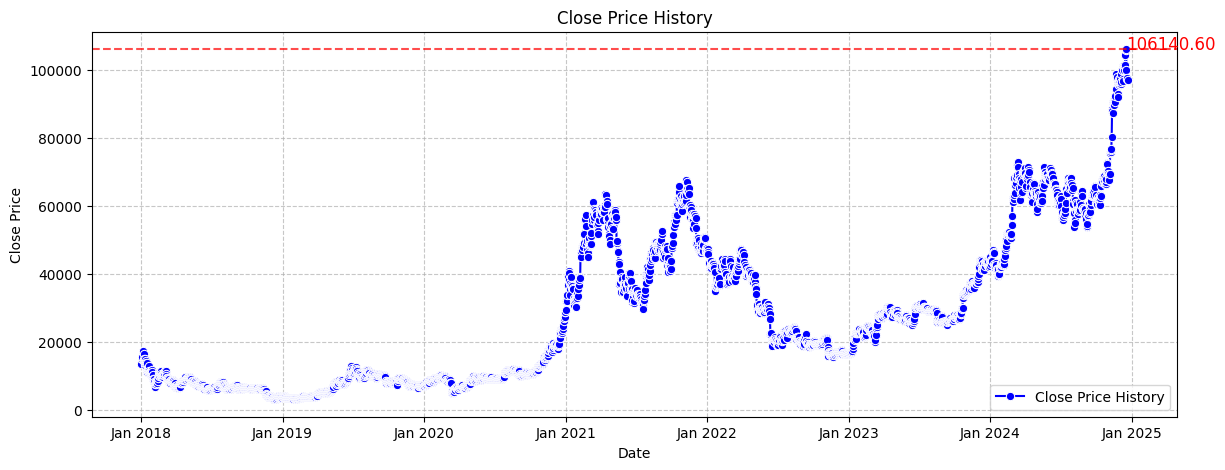

In [5]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='Close', label='Close Price History', marker='o', color='blue')

max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

# Annotate the highest price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext = (max_price_date, max_price + 2),
             fontsize=12, color='red')
plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Preprocesing**

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
scaled_data

array([[0.10126384],
       [0.11413897],
       [0.1162662 ],
       ...,
       [0.91594436],
       [0.91851935],
       [0.91335722]])

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [8]:
sequence_lenght = 30 #30 hari kedepan #xX yY

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_lenght)
X_test, y_test = create_sequences(test_data, sequence_lenght)

**Training Data**

In [9]:
model = Sequential()

# Layer pertama
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Layer kedua
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# layer Dense
model.add(Dense(units=25))
model.add(Dense(units=1))


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=70, batch_size=84, validation_data=(X_test, y_test))

Epoch 1/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0193 - val_loss: 0.0040
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 8.8536e-04 - val_loss: 0.0023
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.0533e-04 - val_loss: 0.0013
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8.9269e-04 - val_loss: 0.0014
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7.3789e-04 - val_loss: 0.0011
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7.8844e-04 - val_loss: 0.0017
Epoch 9/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.9592e-04 - val_loss: 0.0011
Epoch 10/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 7.0933e-04 - val_loss: 0.0015
Epoch 11/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 6.7317e-04 - val_loss: 0.0014
Epoch 12/70
24/24 ━━━━━━━━━━━━━

**Evaluasi Model**

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_scaled, predictions)
print(f'Mean Squared Error: {mse}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error: 6051914.537671518


**Harga Prediksi dan Harga Sebenarnya**

In [12]:
last_30_days = data['Close'][-sequence_lenght:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)

X_predict = []
X_predict.append(last_30_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Prediksi Harga Untuk Bitcoin Selanjutnya: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Prediksi Harga Untuk Bitcoin Selanjutnya: 93116.6171875


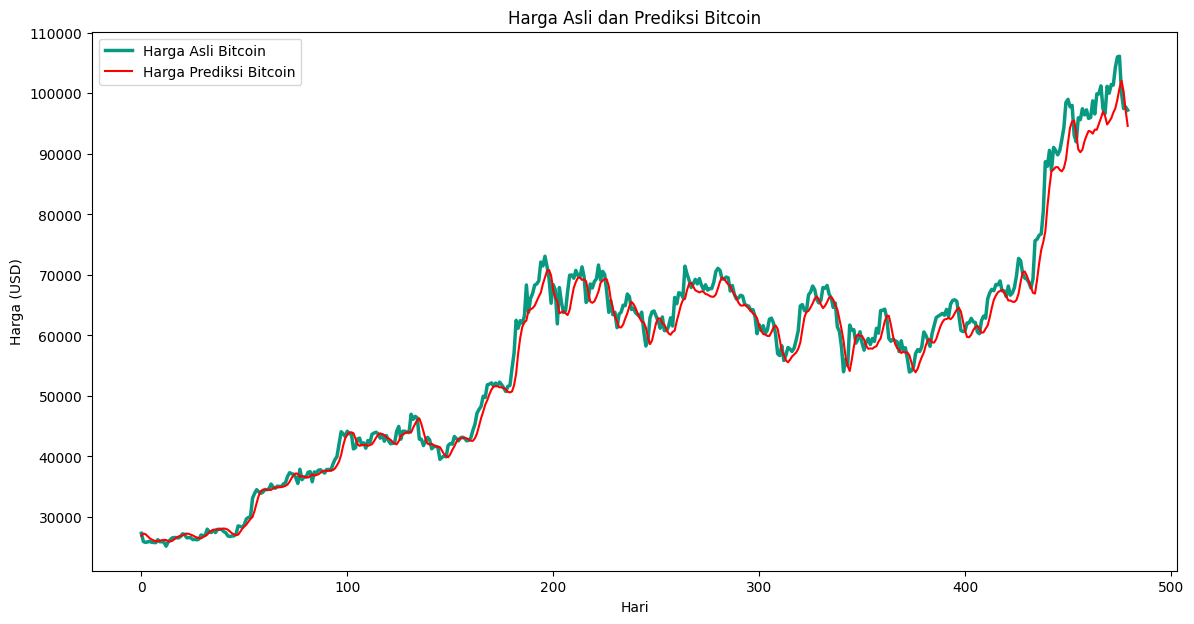

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='Harga Asli Bitcoin', color='#089981', linewidth=2.5 )
plt.plot(predictions, label='Harga Prediksi Bitcoin', color='red', linewidth=1.5 )

plt.title('Harga Asli dan Prediksi Bitcoin')
plt.xlabel('Hari')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()

**Prediksi Harga Bitcoin Masa Depan 1 Bulan**

In [18]:
future_days = 30

last_30_days = data['Close'][-sequence_lenght:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
future_predictions = []

for i in range(future_days):
    X_predict = []
    X_predict.append(last_30_days_scaled)
    X_predict = np.array(X_predict)
    X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

    predicted_price = model.predict(X_predict)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    future_predictions.append(predicted_price_unscaled[0, 0])

    new_scaled_data = np.append(last_30_days_scaled[1:], predicted_price)
    last_30_days_scaled = new_scaled_data.reshape(-1, 1)

future_dates = pd.date_range(start=data.index[-1], periods=future_days + 1, freq='D')[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1

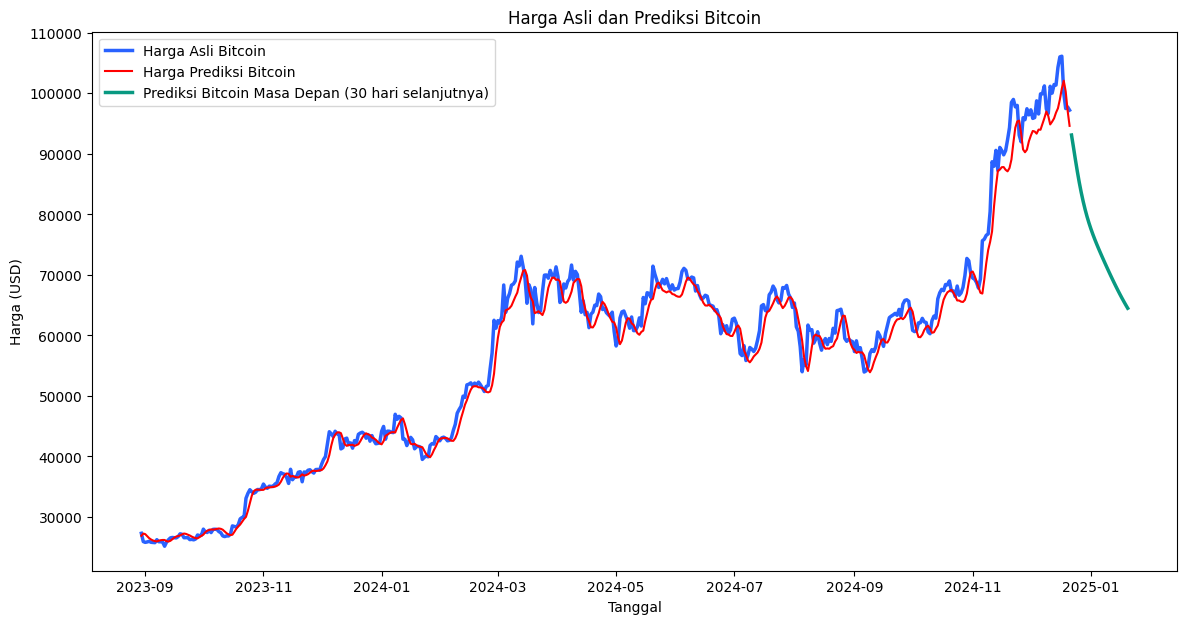

In [19]:
plt.figure(figsize=(14, 7))

plt.plot(data.index[-len(y_test_scaled):], y_test_scaled, label='Harga Asli Bitcoin', color='#2962ff', linewidth=2.5)
plt.plot(data.index[-len(y_test_scaled):], predictions, label='Harga Prediksi Bitcoin', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Prediksi Bitcoin Masa Depan (30 hari selanjutnya)', color='#089981', linewidth=2.5)

plt.title('Harga Asli dan Prediksi Bitcoin')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()